# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pts)


#Ross Gall

#CSCE 5218

#February 23rd, 2025

In [1]:
#Please Note: Original code's curl functions were unable to be saved using the normal method for loading files in the previous code on my Linux machine. Therefore, I had to improvise and download the files a slightly different way.
import urllib.request

# URLs to download
urls = [
    "https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt",
    "https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt"
]

# Output file names
output_files = ["test.dat", "train.dat"]

for url, output_file in zip(urls, output_files):
    urllib.request.urlretrieve(url, output_file)
    print(f"Downloaded {output_file}")

Downloaded test.dat
Downloaded train.dat


In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    # Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))


# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weights, instance):
    # Return the output of the model
    return sigmoid(dot_product(weights, instance))


# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    # Initialization of the weights
    weights = [0] * (len(instances[0]) - 1)  # Adjusted to exclude the label

    for _ in range(epochs):
        for instance in instances:
            # Compute the weighted input value.
            in_value = dot_product(weights, instance)
            # Compute the model output.
            model_output = sigmoid(in_value)
            # Compute the error.
            error = instance[-1] - model_output
            # Update weights.
            for i in range(len(weights)):
                weights[i] += lr * error * model_output * (1 - model_output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The 'train_perceptron' function calculates the error using the sigmoid's direct output instead of using the discrete prediction from the 'predict' function because the sigmoid function uses the dot product value when placed into a range between 0 and 1. Two main methods make up the perceptron's learning procedures: gradient-based learning and continuous output derived from the sigmoid function. Gradient-based learning adjusts the weights according to an error's computed gradient. The result is a continuously variable output measured between 0 and 1. Error propagation updates the weight values such that they might be proportional to the error and additional sigmoid derivative. The 'predict' function is primarily used for classification in which the continuous output of the sigmoid is converted into a discrete class label based on a threshold. A step function is brought into the foray with no possible differentiation capable of occurring at the point of alteration. Said alterations are unsuitable for training yet help whenever the final class is predicted.


The 'train_perceptron' function calculates the error using the sigmoid's direct output instead of using the discrete prediction from the 'predict' function because the sigmoid function uses the dot product value when placed into a range between 0 and 1.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [13]:
# Function for calculating the training size.
def calculate_training_size(total_instances, percentage):
    return round(total_instances * percentage / 100)

# Training and model evaluation function.
def evaluate_model(training_instances, learning_rate, epochs):
    weights = train_perceptron(training_instances, learning_rate, epochs)  #Training the perceptron.
    accuracy = get_accuracy(weights, instances_te)  # Evaluation of the model on test instances.
    return accuracy

# Loading of the dataset.
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Parameters for training.
tr_percent = [5, 10, 25, 50, 75, 100]  # Percentages of training data to use across training process.
num_epochs = [5, 10, 20, 50, 100]       # Number of epochs for training
lr_array = [0.005, 0.01, 0.05]           # Learning rates for testing.

# Initialization of the results list.
results = []

# Iteration over different training set sizes.
for tr_size in tr_percent:
    size = calculate_training_size(len(instances_tr), tr_size)  # Calculating the number of training instances.
    pre_instances = instances_tr[0:size]  # Selecting the subset of training instances.

    # Iteratation over different learning rates.
    for lr in lr_array:
        # Iteration over different numbers of epochs.
        for epochs in num_epochs:
            accuracy = evaluate_model(pre_instances, lr, epochs)  # Evaluate the model

            # Storage of all hyperparameter combinations.
            results.append((size, epochs, lr, accuracy))

            # Printing of the output.
            print(f"# tr: {size:3d}, epochs: {epochs:3d}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
# tr:  20, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



A. Based on the results, all of the training dataset need not be used to obtain the highest accuracy. A just right combination of epochs and learning rate values (lr=0.01, epochs=50) can achieve an accuracy rate of 85.7% with 20 training examples. Said value of 85.7% is the maximum value of accuracy achieved across various training set sizes such as 20, 200 or 300 samples. More training data cannot always guarantee better performance in this instance.


B. A lower accuracy rate in the second run of 68% on 200 training samples compared to those of the first run of 71% on 100 training samples is due to two separate rates of learning. learning Learning rates are different amongst the two runs- 0.050 for the first and 0.005 for the second. This higher value enables the model to examine the space of parameters with further aggression. Higher accuracy is potentially possible with this method. The training process loses its stability in results where high learning rates display poor performance with values such as 28.6%.

C. Across all combinations one can see that 85.7 is the highest percentage value obtained. Said value also appears at multiple instances within the different combinations of hyperparameters. No evidence exists which suggests that 85.7% accuracy can be exceeded with the given space of hyperparameters.
One must use different optimization algorithms or implement multiple techniques of regularization in order for higher accuracy to be achieved.

D. Training a model for a greater length of time is not always possible, as multiple instances within the results show increasing the total number of epochs changes nothing or stifles performance. A learning rate of 0.005 with a tr of 40 gives a consistent score of 71.4% irrespective of the number of epochs. Conversely, a training process with a learning rate of 0.05 and a tr of 20 sees accuracy drop from 85.7% with 10 epochs down to 42.9% with 20 epochs. Longer training times have the capability to cause instability through overfitting with higher learning rates. Both the values of hyperparameters and the size of a training set must be within acceptable limits of rationality if a reasonable number of epochs is to be obtained.


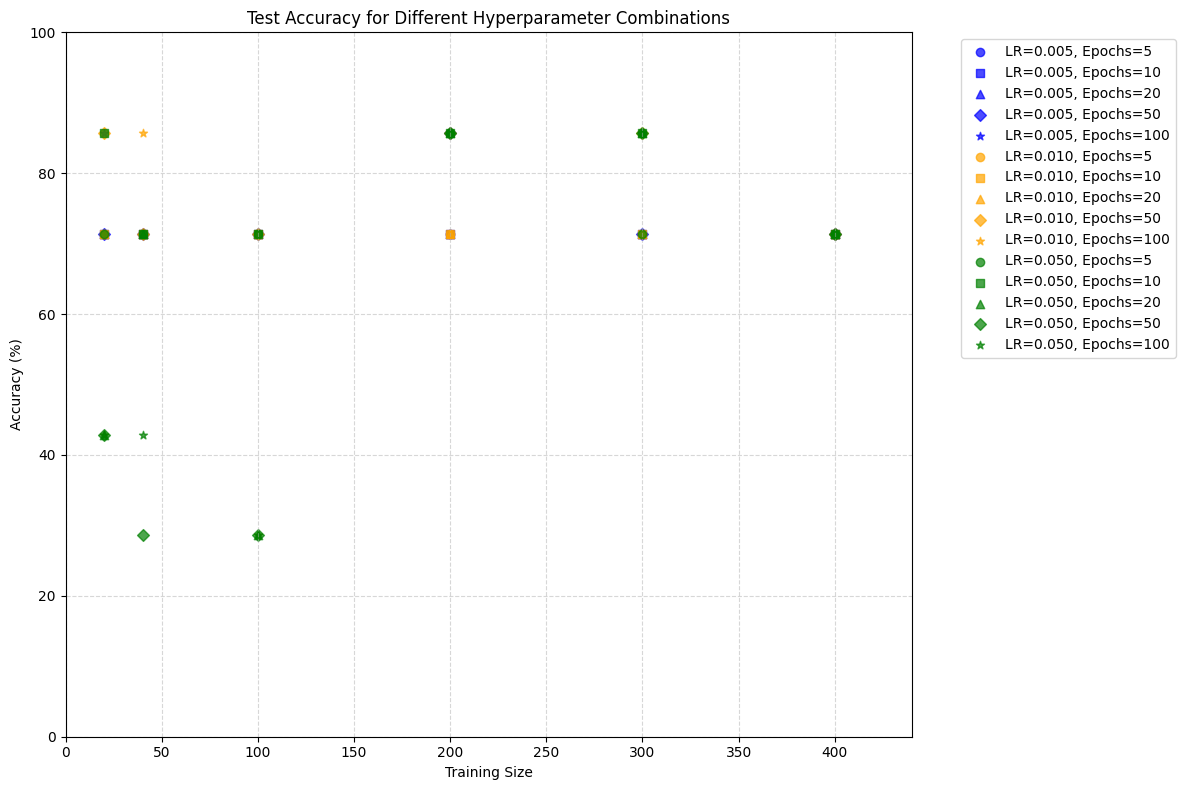

In [15]:
#Importing additional libraries.
import numpy as np
import matplotlib.pyplot as plt

# Conversion of model output to structured numpy array.
data = np.array(results, dtype=[
    ('tr_size', 'i4'),     # Training size
    ('epochs', 'i4'),      # Number of epochs
    ('lr', 'f4'),          # Learning rate
    ('accuracy', 'f4')     # Accuracy
])

# Creation of plot figure.
plt.figure(figsize=(12, 8))

# Different markers for different epoch values
markers = {5: 'o', 10: 's', 20: '^', 50: 'D', 100: '*'}


colors = ['blue', 'orange', 'green']  # A single color for each learning rate.

# Scatter plot created for each learning rate and epoch combination.
for i, lr in enumerate(np.unique(data['lr'])):  # Iteration through each unique learning rate.
    for epoch in np.unique(data['epochs']):      # Iterate through unique number of epochs.
        # Filter data for this specific learning rate and epoch.
        mask = (data['lr'] == lr) & (data['epochs'] == epoch)  # Create a mask to filter relevant data.

        # Plotting of the scatter points.
        plt.scatter(data['tr_size'][mask],
                    data['accuracy'][mask],
                    marker=markers[epoch],
                    c=colors[i],  # Use the defined color based on the learning rate index.
                    label=f'LR={lr:.3f}, Epochs={epoch}',
                    alpha=0.7)

# Plotting the scatter plot
plt.title("Test Accuracy for Different Hyperparameter Combinations")
plt.xlabel("Training Size")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle='--', alpha=0.5)

# Placement of the legend.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set axis limits
plt.xlim(0, max(data['tr_size']) * 1.1)
plt.ylim(0, 100)

# Adjust layout to prevent legend cutoff.
plt.tight_layout()

# Show plot.
plt.show()